In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [76]:
data = pd.read_csv('Jamboree_Admission.csv')
df = data
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [77]:
# All unique column
df = df.drop(columns='Serial No.')

In [78]:
df.shape

(500, 8)

In [79]:
#All values are numerical so no need of encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [80]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [81]:
#No NA values
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [82]:
# Making separate as it is the prediction variable
target = df['Chance of Admit ']
df = df.drop(columns=['Chance of Admit '])

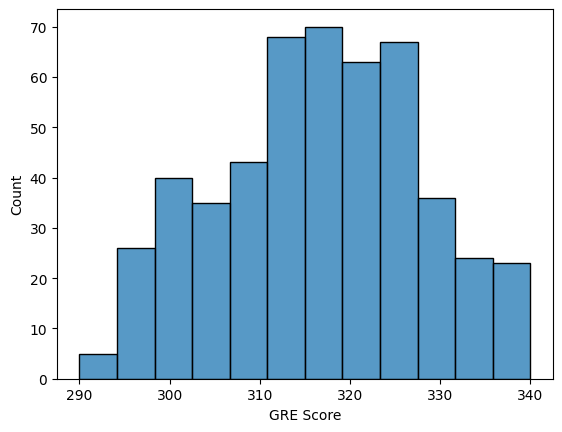

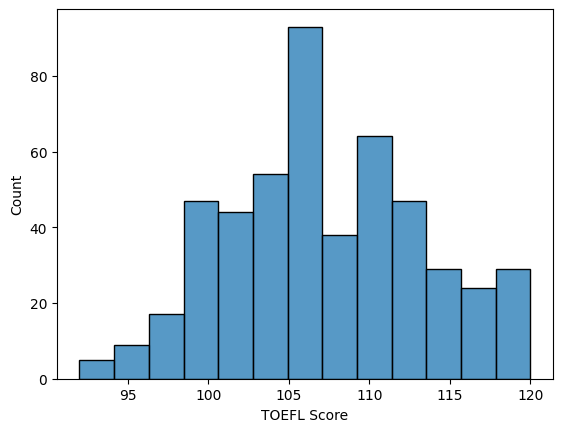

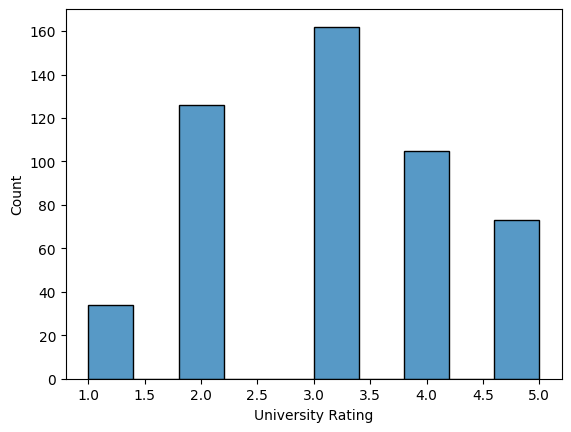

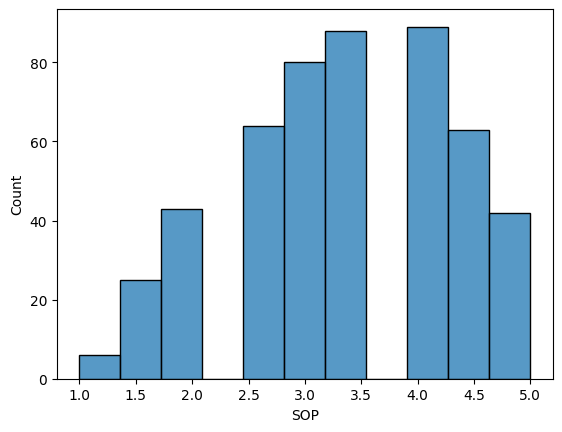

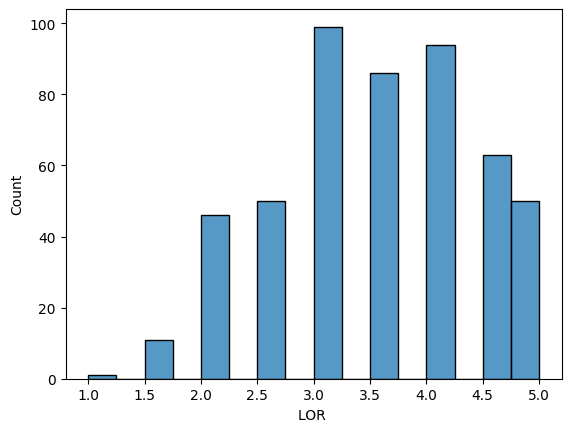

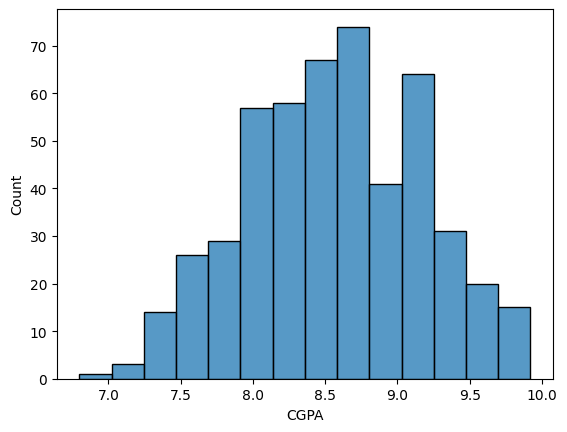

In [83]:
# Almost all values are normally distributed
for col in df.drop(columns=['Research']).columns:
    sns.histplot(data= df, x = col)
    plt.show()

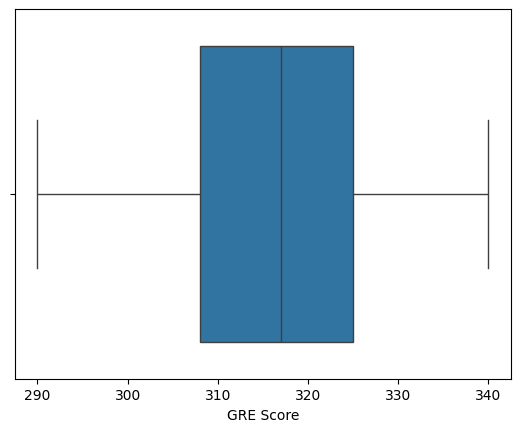

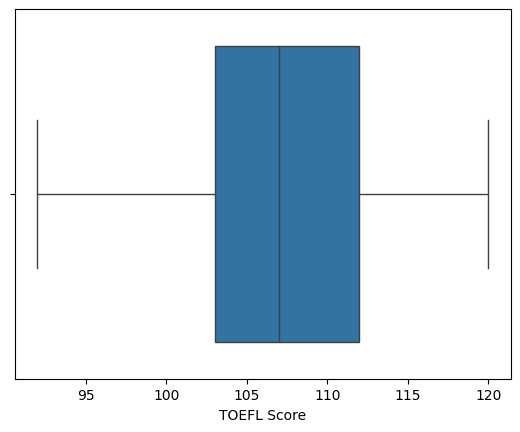

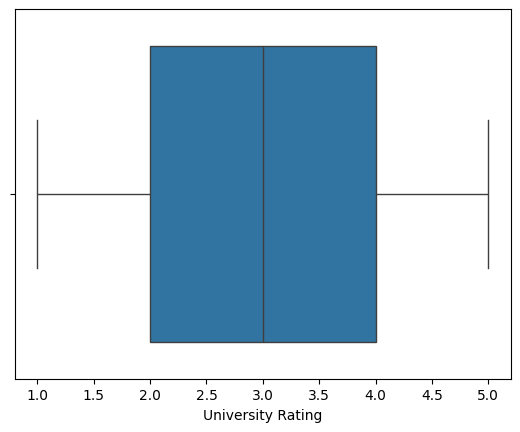

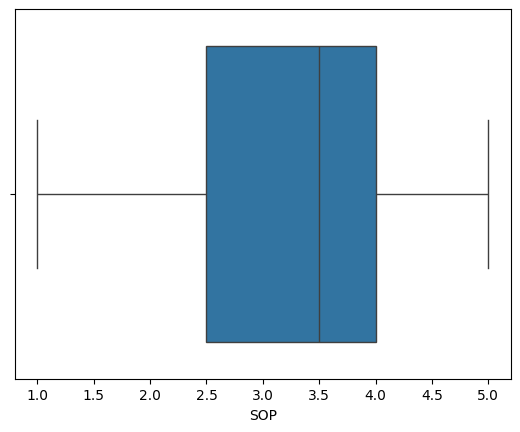

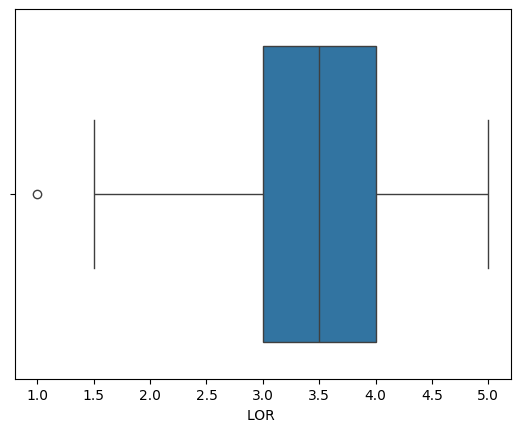

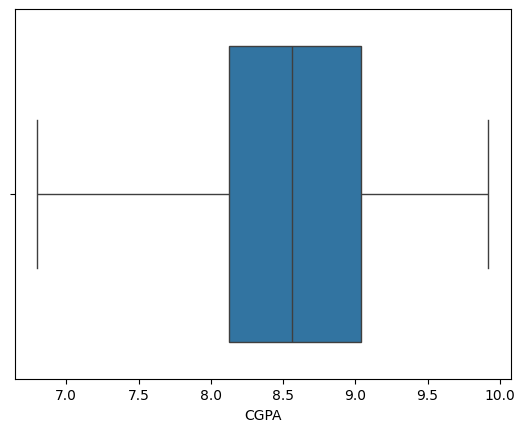

In [84]:
# There are no outliers in the dataset
for col in df.drop(columns=['Research']).columns:
    sns.boxplot(data= df, x = col)
    plt.show()

Text(0.5, 1.0, 'Probability of Admit by Research')

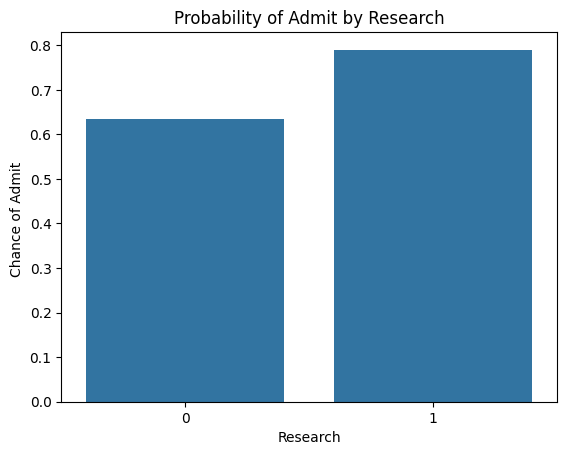

In [85]:
res_data = data.groupby('Research').agg({'Chance of Admit ':'mean'}).reset_index()
sns.barplot(data = res_data, x ='Research', y = 'Chance of Admit ')
plt.title("Probability of Admit by Research")

Text(0.5, 1.0, 'Probability of Admit by University Rating')

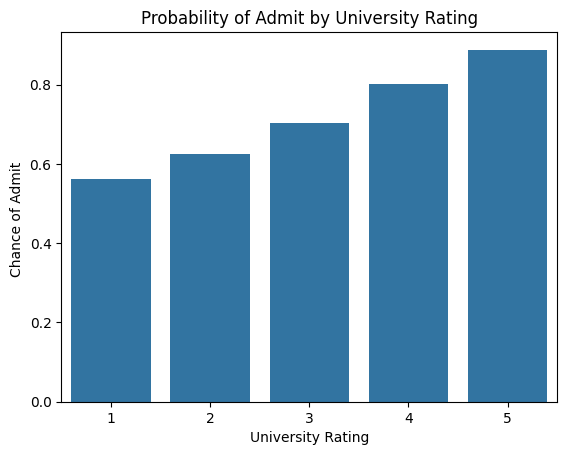

In [86]:
uni_data = data.groupby('University Rating').agg({'Chance of Admit ':'mean'}).reset_index()
sns.barplot(data = uni_data, x ='University Rating', y = 'Chance of Admit ')
plt.title("Probability of Admit by University Rating")

Text(0.5, 1.0, 'Feature Correlation Map')

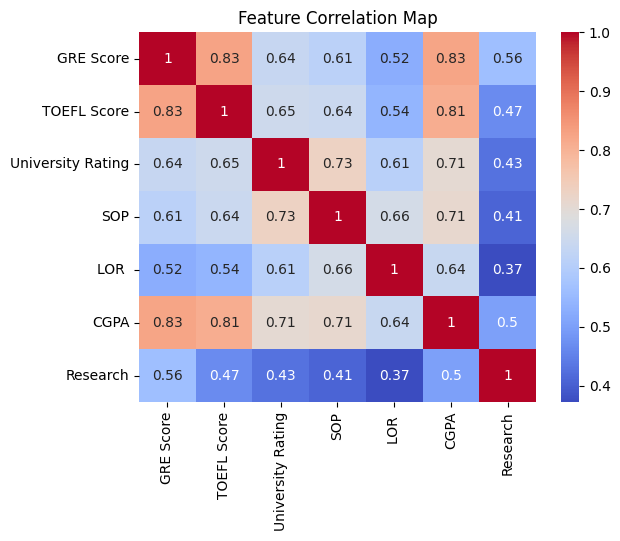

In [87]:
# There is no high correlation of greater than 0.9
correlation_map = df.corr()
sns.heatmap(correlation_map, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Map")

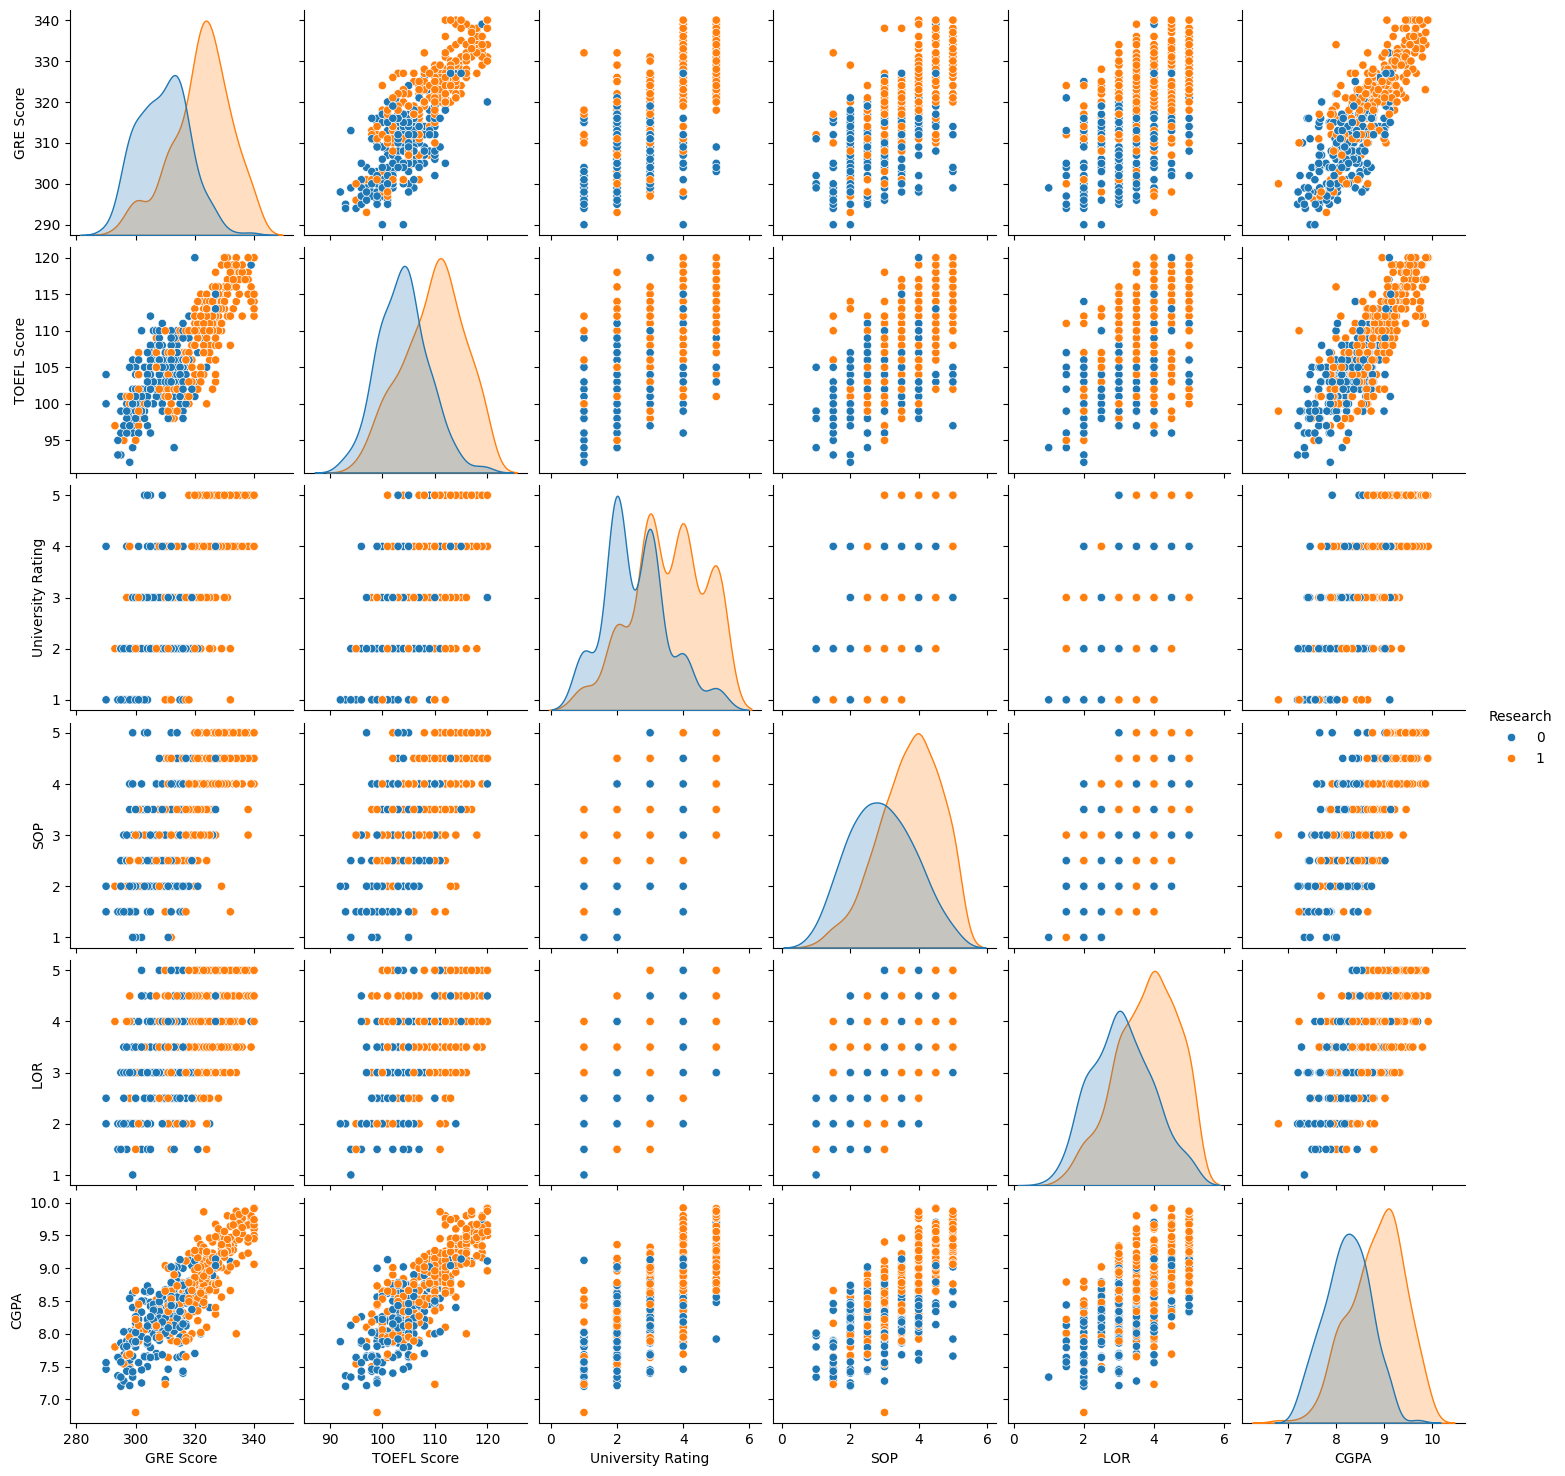

In [88]:
# There is a positive relation between variables and top students do research
sns.pairplot(data=df, hue='Research')
plt.show()

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(df,target, random_state=4, test_size=0.2)

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [91]:
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

In [92]:
# No features have VIF greater than 5
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.75
0,GRE Score,4.64
1,TOEFL Score,3.96
3,SOP,2.77
2,University Rating,2.58
4,LOR,1.98
6,Research,1.52


In [93]:
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)
X_sm = sm.add_constant(X_tr_scaled)

sm_model = sm.OLS(Y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     275.9
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          3.62e-147
Time:                        15:17:27   Log-Likelihood:                 569.16
No. Observations:                 400   AIC:                            -1122.
Df Residuals:                     392   BIC:                            -1090.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7175      0.003    243.581      0.0

In [94]:
X_train_2 = X_train[X_train.columns.drop('University Rating')]

In [95]:
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train_2)
X_sm = sm.add_constant(X_tr_scaled)

sm_model = sm.OLS(Y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     322.6
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          1.97e-148
Time:                        15:17:27   Log-Likelihood:                 569.14
No. Observations:                 400   AIC:                            -1124.
Df Residuals:                     393   BIC:                            -1096.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7175      0.003    243.880      0.0

In [96]:
X_train_3 = X_train_2[X_train_2.columns.drop('SOP')]

In [97]:
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train_3)
X_sm = sm.add_constant(X_tr_scaled)

sm_model = sm.OLS(Y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     387.5
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          1.23e-149
Time:                        15:17:28   Log-Likelihood:                 568.88
No. Observations:                 400   AIC:                            -1126.
Df Residuals:                     394   BIC:                            -1102.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7175      0.003    244.031      0.0

In [98]:
X_train = X_train_3

In [99]:
def adj_r(r_sq, X, Y):
    n = len(Y)
    k = X.shape[1]
    if n - k - 1 <= 0:
        return None  # Return None or handle small sample sizes gracefully
    adj_r1 = 1 - ((1 - r_sq) * (n - 1) / (n - k - 1))
    return adj_r1

In [100]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [101]:
X_test = X_test[X_test.columns.drop(['SOP', 'University Rating'])]
X_test = scaler.transform(X_test)

In [102]:
model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

In [103]:
Y_hat = model.predict(X_test)

In [104]:
# The mean of residual is very close to zero
residual = Y_test - Y_hat
np.mean(residual)

-0.00576394359941773

Text(0.5, 1.0, 'Homoskedastic Validation')

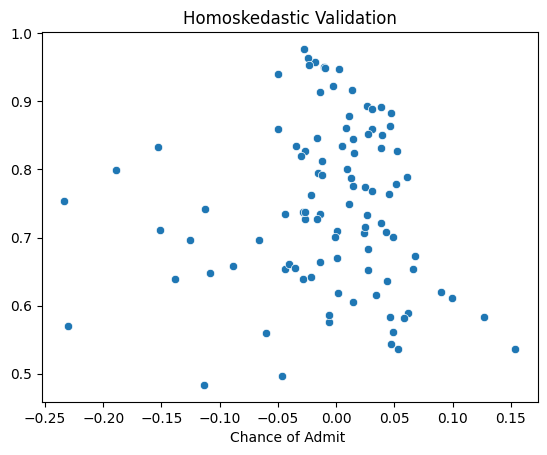

In [105]:
# There seems to be heteroskedasticity
sns.scatterplot(x = residual, y= Y_hat)
plt.title("Homoskedastic Validation")

In [106]:
import statsmodels.stats.api as sms
# The goldfeld-quandt test gives that the residual are homoskedastic
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_test)
p_value = test[1]

if p_value > 0.05:
    print("The residual are in homoskedasticity")
else:
    print("The residual are in heteroskedasticity")

The residual are in homoskedasticity


In [107]:
from scipy.stats import shapiro

Text(0.5, 1.0, 'Normality of residual')

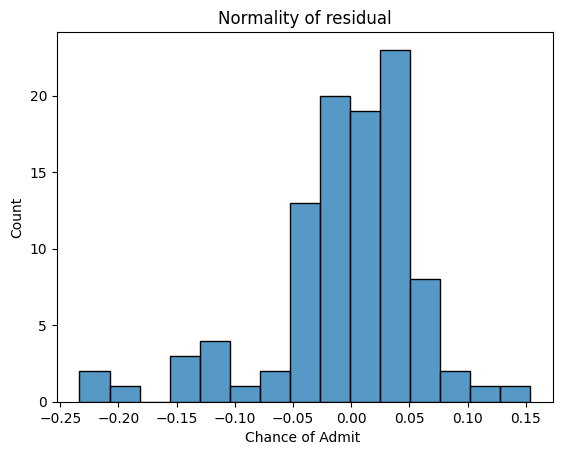

In [108]:
sns.histplot(x=residual)
plt.title("Normality of residual")

In [109]:
# The shapiro test gives us that the residual are not normally distributed
shapiro_test = shapiro(residual)
if shapiro_test.pvalue > 0.05:
    print("The residual are normally distributed")
else:
    print("The residuals are not normally disrtributed")


The residuals are not normally disrtributed


In [110]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error

def metrics_custom(X_test, Y_test, Y_hat):
    mae = mean_absolute_error(Y_test, Y_hat)
    rmse = root_mean_squared_error(Y_test, Y_hat)
    r_sq = model.score(X_test, Y_test)
    adj_r_sq = adj_r(r_sq, X_test, Y_test)

    print("The mean absolute error is :", mae)
    print("The root mean absolute error is :", rmse)
    print("The R2 score is: ", r_sq)
    print("The Adjusted R2 score is: ", adj_r_sq)
    return mae, rmse, r_sq, adj_r_sq

In [111]:
metrics_custom(X_test, Y_test, Y_hat)

The mean absolute error is : 0.04554846724251889
The root mean absolute error is : 0.06514359880691861
The R2 score is:  0.7696471898847517
The Adjusted R2 score is:  0.7573943808360682


(0.04554846724251889,
 0.06514359880691861,
 0.7696471898847517,
 0.7573943808360682)

Text(0.5, 1.0, 'Feature wise Model Weightage')

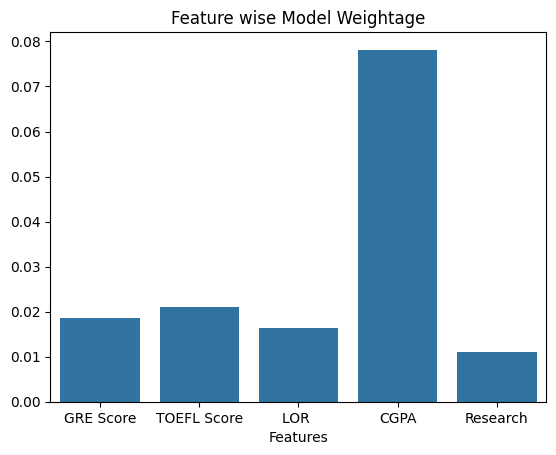

In [112]:
sns.barplot(x = X_train_3.columns, y = model.coef_)
plt.xlabel('Features')
plt.title('Feature wise Model Weightage')

In [113]:
model.coef_

array([0.01859595, 0.02102924, 0.01633745, 0.07816655, 0.01114844])

In [114]:
model.intercept_

0.717475